# Generación de señales de entrada para testear el filtro IIR

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tool._fixedInt import *
from scipy import signal
from scipy.signal import lfilter, firwin
from scipy.fftpack import fft,fftshift
from random import *

## Respuesta en frecuencia del filtro

Valor de a[0]: 7FFF
Valor de a[1]: 0666
Valor de a[2]: 1FDF
Valor de b[0]: 27AE
Valor de b[1]: 4666
Valor de b[2]: 3333


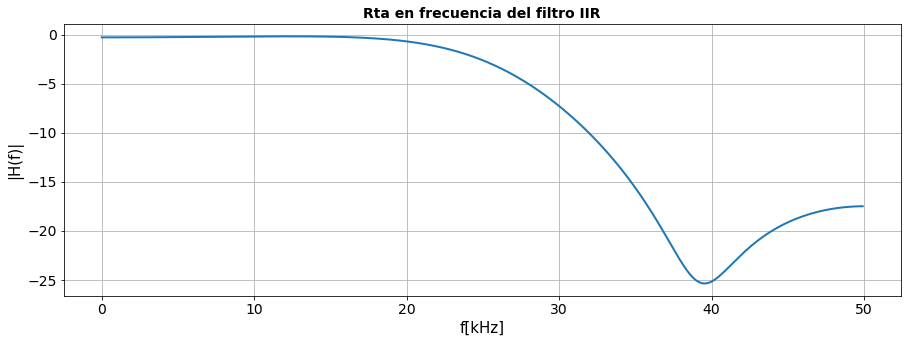

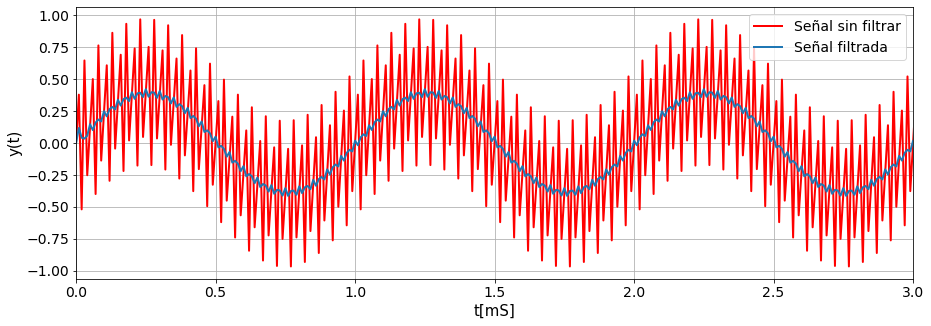

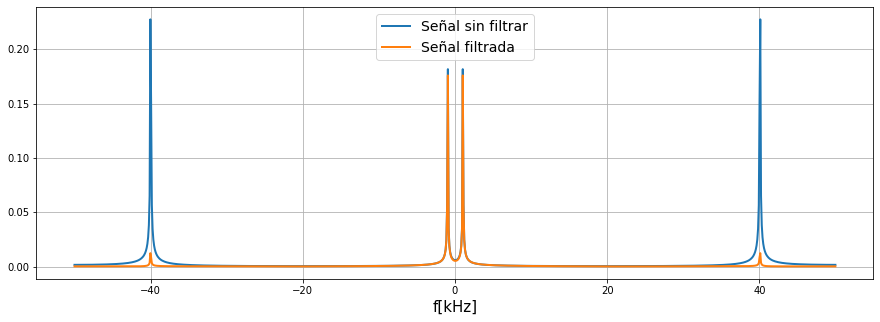

In [16]:
NB_DATA  = 16
NBF_DATA = 15

N    = 1024
NFFT = N
fs   = 100e3
Ts   = 1/fs
t    = np.arange(N)*Ts
f1   = 1e3
f2   = 40e3

a_float = [1.0, 0.05, 0.249]
a_coef  = arrayFixedInt(NB_DATA, NBF_DATA, a_float)
a = [i.fValue for i in a_coef]

b_float = [0.31, 0.55, 0.4]
b_coef  = arrayFixedInt(NB_DATA, NBF_DATA, b_float)
b = [i.fValue for i in b_coef]

w,h = signal.freqz(b=b, a=a)
f_iir = w*fs/(2*np.pi)
h = 20*np.log10(abs(h))

noisy_signal = 0.4*np.sin(2*np.pi*f1*t) + 0.6*np.sin(2*np.pi*f2*t)
noisy_signal_filtered = lfilter(b,a,noisy_signal)

X          = fft(noisy_signal, NFFT)
X          = fftshift(X)

X_filtered = fft(noisy_signal_filtered, NFFT)
X_filtered = fftshift(X_filtered)

f = np.linspace(-fs/2, fs/2, NFFT)

plt.figure(figsize=(15,5))
plt.plot(f_iir/1e3,h, linewidth=2)
plt.xlabel("f[kHz]", fontsize = 15)
plt.ylabel("|H(f)|", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Rta en frecuencia del filtro IIR", fontsize = 14, fontweight = "bold")
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(t/1e-3,noisy_signal, color = "red", linewidth = 2, label = "Señal sin filtrar")
plt.plot(t/1e-3,noisy_signal_filtered, linewidth=2, label = "Señal filtrada")
plt.xlabel("t[mS]", fontsize = 15)
plt.ylabel("y(t)", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = "best", fontsize = 14)
plt.xlim([0.0, 3])
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(f/1e3,1/NFFT*np.abs(X), label = "Señal sin filtrar", linewidth = 2)
plt.plot(f/1e3,1/NFFT*np.abs(X_filtered), label = "Señal filtrada", linewidth = 2)
plt.xlabel("f[kHz]", fontsize = 15)
plt.legend(loc = "best", fontsize = 14)
plt.grid(True)

xn = arrayFixedInt(NB_DATA, NBF_DATA, noisy_signal)
xn_fix = [i.fValue for i in xn]

input_sig = open("input_iir.mem","w")
for i in xn:
    input_sig.write(f"0x{i.__hex__()}\n")
input_sig.close()

counter = 0
for i in a_coef:
    print(f"Valor de a[{counter}]: {i.__hex__()}")
    counter = counter + 1

counter = 0
for i in b_coef:
    print(f"Valor de b[{counter}]: {i.__hex__()}")
    counter = counter + 1